In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
from scipy import stats
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from colorama import Fore
import warnings

<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>

# **Final Project**
### CSPB 3022 
    
    
## **Project Topic:** 

## Kidney Functionality as a Predictor of Heart Failure

### **Project Goal:** 
The goal of this project is to create a binary classifier for measuring kidney functionality to predict if there will be heart failure in a patient.
    
### **Type of Problem:** 
This will be a binary classification that will attempt to predict if the patient will have a heart failure leading to a death event. 
   
### **Project Motivation:** 
Heart disease is one of the leading causes of death in the world and can impact those from all stages of life. The heart and kidneys are some of the most important organs in your body and they work in sync together to perform their functions. When one begins to fail, a knock-on effect can occur, increasing the stress or reducing the functionality of the other. In this instance, when the kidneys become impaired, the body will increase blood pressure in an attempt to increase the blood supply for the kidneys. This causes the heart to work harder to compensate for the increased arterial blood pressure, heightening the workload and stress on the heart. This project is important to me as I have suffered the loss of someone who was still young in life because of the link between kidney and heart failure. Given the prevalence of these issues in modern society, I am sure that I am not alone in this.

# **Dataset**

## **Sources:**

The dataset for this project can be found at both the UCI ML Repository: 
https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#

As well as on Kaggle:
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data


Each row represents a patient with their associated health metrics and their eventual outcome.

## **Dataset Size and Features**
This dataset is rather small at 299 rows with 13 different features (columns). Among these there are:

6 Boolean: (Anemia, High Blood Pressure, Diabetes, Smoker, Sex, Death Event (Died))

7 Numeric: (Age, Creatinine Phosphokinase, Ejection Fraction, Platelets, Serum Creatinine, Serum Sodium, and Time (Follow-up period))

The target class is “Death Event” which indicates if the patient died during the follow-up period.

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', dtype='unicode')
#Here the data is read in

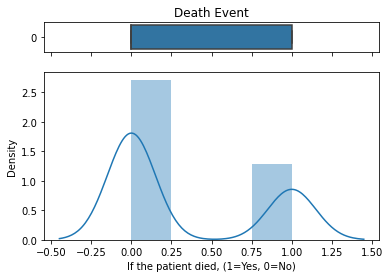

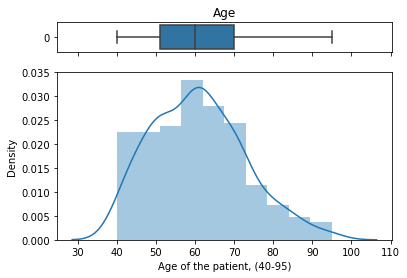

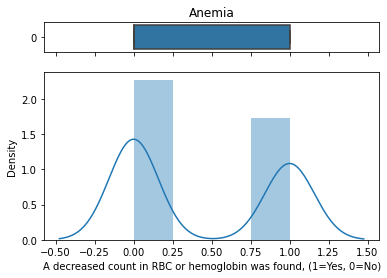

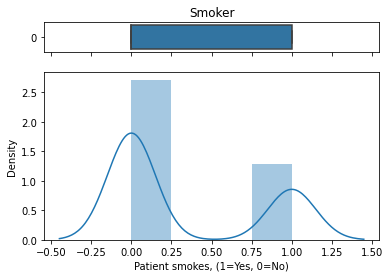

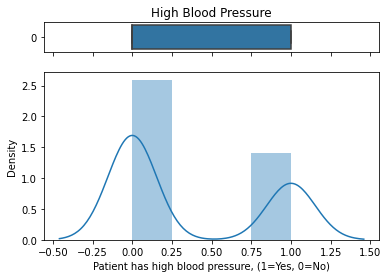

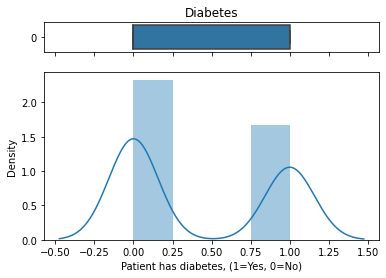

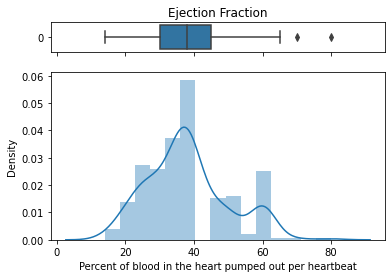

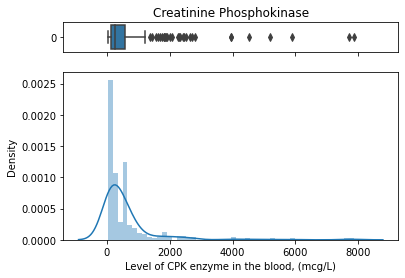

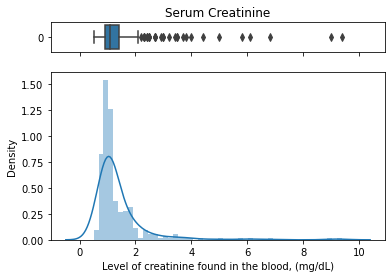

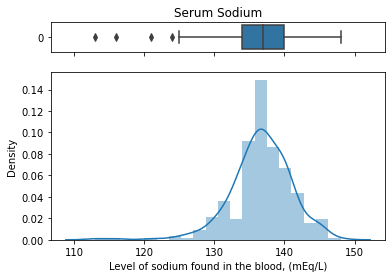

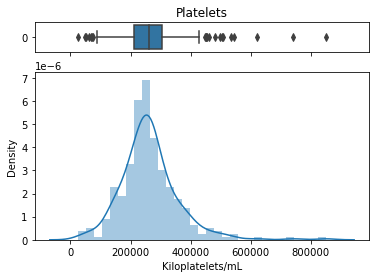

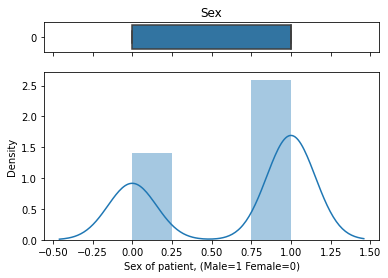

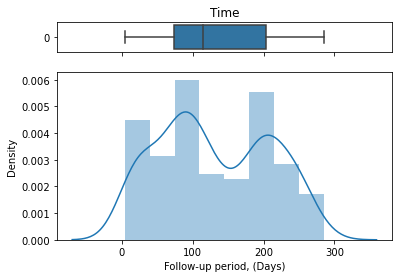

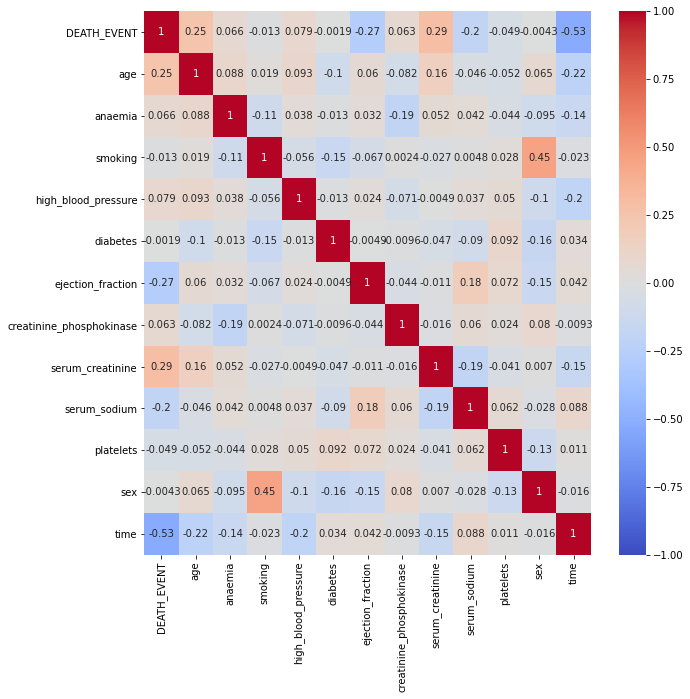

In [3]:
#This section makes a dataframe of the parts of the dataset that will be used in this project.
#It then produces the graphs below for data analysis.

df = df[["DEATH_EVENT","age","anaemia","smoking","high_blood_pressure","diabetes","ejection_fraction","creatinine_phosphokinase","serum_creatinine","serum_sodium", "platelets", "sex", "time"]]

df["DEATH_EVENT"]=df["DEATH_EVENT"].astype('float')
df["age"]=df["age"].astype('float')
df["anaemia"]=df["anaemia"].astype('float')
df["smoking"]=df["smoking"].astype('float')
df["high_blood_pressure"]=df["high_blood_pressure"].astype('float')
df["diabetes"]=df["diabetes"].astype('float')
df["ejection_fraction"]=df["ejection_fraction"].astype('float')
df["creatinine_phosphokinase"]=df["creatinine_phosphokinase"].astype('float')
df["serum_creatinine"]=df["serum_creatinine"].astype('float')
df["serum_sodium"]=df["serum_sodium"].astype('float')
df["platelets"]=df["platelets"].astype('float')
df["sex"]=df["sex"].astype('float')
df["time"]=df["time"].astype('float')

warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["DEATH_EVENT"], ax=ax_box, orient="h").set(title='Death Event')
sns.distplot(df["DEATH_EVENT"], ax=ax_hist).set(xlabel='If the patient died, (1=Yes, 0=No)')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["age"], ax=ax_box, orient="h").set(title='Age')
sns.distplot(df["age"], ax=ax_hist).set(xlabel='Age of the patient, (40-95)')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["anaemia"], ax=ax_box, orient="h").set(title='Anemia')
sns.distplot(df["anaemia"], ax=ax_hist).set(xlabel='A decreased count in RBC or hemoglobin was found, (1=Yes, 0=No)')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["smoking"], ax=ax_box, orient="h").set(title='Smoker')
sns.distplot(df["smoking"], ax=ax_hist).set(xlabel='Patient smokes, (1=Yes, 0=No)')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["high_blood_pressure"], ax=ax_box, orient="h").set(title='High Blood Pressure')
sns.distplot(df["high_blood_pressure"], ax=ax_hist).set(xlabel='Patient has high blood pressure, (1=Yes, 0=No)')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["diabetes"], ax=ax_box, orient="h").set(title='Diabetes')
sns.distplot(df["diabetes"], ax=ax_hist).set(xlabel='Patient has diabetes, (1=Yes, 0=No)')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["ejection_fraction"], ax=ax_box, orient="h").set(title='Ejection Fraction')
sns.distplot(df["ejection_fraction"], ax=ax_hist).set(xlabel='Percent of blood in the heart pumped out per heartbeat')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["creatinine_phosphokinase"], ax=ax_box, orient="h").set(title='Creatinine Phosphokinase')
sns.distplot(df["creatinine_phosphokinase"], ax=ax_hist).set(xlabel='Level of CPK enzyme in the blood, (mcg/L)')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["serum_creatinine"], ax=ax_box, orient="h").set(title='Serum Creatinine')
sns.distplot(df["serum_creatinine"], ax=ax_hist).set(xlabel='Level of creatinine found in the blood, (mg/dL)')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["serum_sodium"], ax=ax_box, orient="h").set(title='Serum Sodium')
sns.distplot(df["serum_sodium"], ax=ax_hist).set(xlabel='Level of sodium found in the blood, (mEq/L)')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["platelets"], ax=ax_box, orient="h").set(title='Platelets')
sns.distplot(df["platelets"], ax=ax_hist).set(xlabel='Kiloplatelets/mL')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["sex"], ax=ax_box, orient="h").set(title='Sex')
sns.distplot(df["sex"], ax=ax_hist).set(xlabel='Sex of patient, (Male=1 Female=0)')
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df["time"], ax=ax_box, orient="h").set(title='Time')
sns.distplot(df["time"], ax=ax_hist).set(xlabel='Follow-up period, (Days)')
ax_box.set(xlabel='')

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

## Data Cleaning: 
Having dealt with very dirty datasets before, one of the main focuses for this project is the usage of a very clean dataset so as to help clarify and confirm the link between the variables relating to kidney function and heart failure.

In [4]:
df.describe().T #Generates some quick statistics about the dataset.

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,299.0,0.321070,0.467670,0.0,0.0,0.0,1.0,1.0
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
smoking,299.0,0.321070,0.467670,0.0,0.0,0.0,1.0,1.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0


In [5]:
df.isnull().sum() #Sums all null values in the dataset.

DEATH_EVENT                 0
age                         0
anaemia                     0
smoking                     0
high_blood_pressure         0
diabetes                    0
ejection_fraction           0
creatinine_phosphokinase    0
serum_creatinine            0
serum_sodium                0
platelets                   0
sex                         0
time                        0
dtype: int64

Upon examination of the above tables and graphs, we find that while there are no missing values, there are some outliers present. Given the lack of data points in this dataset however I am wary of removing said outliers as this could very well lead to overfitting. These outliers will be reexamined after initial models and analysis have been performed.

### **Correlation Matrix**

Looking at the correlation matrix, several possible relationships can be identified:

Time and ejection fraction are strongly inversely correlated to death events. This makes sense given the importance in getting diagnosed early with a heart issue so that one can receive treatment in time. Ejection fraction is the measurement of how much blood is pumped out of your heart with each contraction- this is functionally a direct measure of heart efficiency. While both of these are important factors in heart health and therefore heart failure prediction rates, they are not necessarily as good indicators of kidney function for this project.


Creatinine phosphokinase, high blood pressure, age, and anemia all have notable positive correlations with death event. These factors however are more directly related to heart health than kidney health so while they should be accounted for when trying to define relationships, they are not the focus of this project. 


Smoking, diabetes, platelet count, and sex do not display notable relationships with death event.


Serum creatinine has the strongest positive correlation with death event. Creatinine is a waste product in your blood that comes from your muscles. Healthy kidneys are able to filter it out via your urine so when your kidneys are not working well, serum creatinine levels go up. 


Serum sodium has a notable inverse relationship with death events. Your body tries its best to keep sodium levels within a very narrow range. Excess sodium is discarded via urine through the kidneys so when abnormal levels are found, it likely indicates some type of underlying kidney problem. Given that a test result found to be too high or too low can be indicators of kidney disease, the found correlation will have to be given further research.


Given below is the modified dataset and correlation matrix that will be used for this project. 

The removed factors are: smoking, diabetes, platelets, and sex.

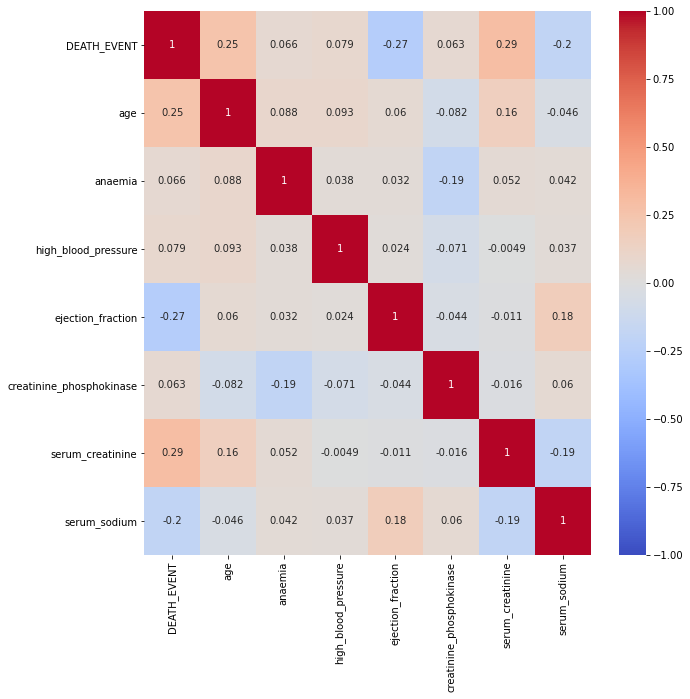

In [21]:
df_modified = df[["DEATH_EVENT","age","anaemia","high_blood_pressure","ejection_fraction","creatinine_phosphokinase","serum_creatinine","serum_sodium"]]
plt.figure(figsize=(10,10))
sns.heatmap(df_modified.corr(), vmin=-1, cmap='coolwarm', annot=True);

## **EDA Findings Summary:**
The hypothesis to be tested in this project is that kidney function factors can be used to predict heart failures. The primary factors to be analysed will be the serum levels of both sodium and creatinine, while also accounting for age, anemia, blood pressure, ejection fraction, and CPK in the model.

Five factors were removed from the original dataset: smoking, diabetes, platelets, time, and sex.

While there are outliers* present, given the small size and cleanliness of the dataset it would likely be irresponsible to remove them at this stage as they may very well still be important indicators of heart failure. Removing them now may lead to overfitting in future models.

*The possible creatinine outliers have been found to fall within possible range values; therefore they are not outliers and will be included in the dataset.

## **Forseen Difficulties:**
The main difficulty that I can identify at this stage is likely going to be strength of relationships between the dependent and independent variables. The body is a complex organism with each organ playing their own important but interdependent role; when lifestyle choices and differences are factored into this you are left with a system full of complex interdependencies that are still being understood to this day- this is not an experiment in a vaccum. As such, despite one's best efforts relationships between organ dependencies can be hard to define and pin down. This may result in a future model with less than perfect fitting.

Addtionally on top of all of the additional factors to control for, a lot of those present in this dataset are represented as a simple bool when the conditions themselves are full of complexity that cannot be adequately described with a simple 0 or 1. While the dataset may be clean, there is likely a lot of nuance left behind by a number of the given factors. This will be hard to account for in future models.

## **Plans for Model Approach:**
The models that I will implement for this dataset are Logistic Regression, K-Nearest Neighbors, and Random Forest. 

Given that Death_Event is both binary and categorical, a logistic regression is likely useful here since it is basically a linear regression but for classification. Given that it is resistant to overfitting and easy to get working, this will likely be the first good step at understanding how to build the models from the outset.

K-Nearest Neighbors is a pattern recognition algorithm that utilizes training datasets to be able to find k closest relatives to make future predictions. Given that we functionally have a binary output with Death_Event present in the data, a supervised learning model such as this may do better than the logistic regression. Since KNN is a lazy algorithm that can take a long time to calculate with large amounts of data, this small dataset will work well here.

Random Forest is basically a large number of individual decision trees operating together as an ensemble. It tends to work well given that a large number of relatively uncorrelated trees operating together will tend to outperform any of the individual models composed of it. Because of the low correlation between models, they functionally protect each other from their individual errors. Given that its main downsides will be its computational complexity as well as its long training period, the practical limition of this approach may very well end up being a lack of real time for model adjustments.

Individually, these models can have issues that can be difficult to work around. However I believe that together they can help paint a clearer picture of the situation. Additional difficulties to take into consideration during model implementation will likely be concerning how to handle feature scaling.

## **Feature Engineering**

In [7]:
Features_eng = ["age","anaemia","high_blood_pressure","ejection_fraction","creatinine_phosphokinase","serum_creatinine","serum_sodium"]
x_eng = df[Features_eng]
y_eng = df["DEATH_EVENT"]
acclist=[]
x_train_eng,x_test_eng,y_train_eng,y_test_eng = train_test_split(x_eng,y_eng, train_size=0.75, random_state=42)
#This sets up the test/train for the feature engineering in the next step.

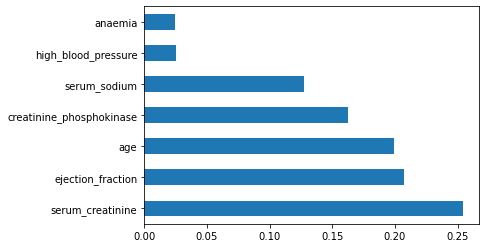

In [8]:
rfc=RandomForestClassifier()
rfc.fit(x_train_eng,y_train_eng)
rfc.feature_importances_
mask=rfc.feature_importances_ >0.1
x_reduced=x_eng.loc[:,mask]
feat_importances = pd.Series(rfc.feature_importances_, index=df[Features_eng].columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()
#This is a random forest classifier used to gauge feature importance. 
#The higher the calculated value, the more important the feature. 

Here we see that both anemia and high blood pressure are likely safe to discard.

### **Test/Train Split**

In [9]:
Features = ["age","ejection_fraction","creatinine_phosphokinase","serum_creatinine","serum_sodium"]
x = df[Features]
y = df["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.75, random_state=42)
#Test/Train set up with the features selected for use in the models.

### **Scaled Test/Train Split**

In [10]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y, train_size=0.75, random_state=42)
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
#A seperate Test/Train with same seed is set up to be used in the second run.

Feature scaling is used to normalize the range of independent variables or features of data. It is necessary to normalize features so that no features are too large and all features are on the same scale.

## **Hyperparameter Tuning**

### Number of neighbors to inspect in the KNN model

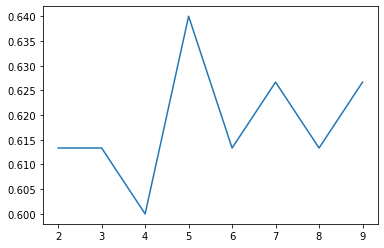

In [11]:
neighborlist = []
for neighbors in range(2,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    neighborlist.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(2,10)), neighborlist)
plt.show()
#Uses a K neighbors classifier to identify a good value for hyperparameter tuning. 

Here we find a value of 5 likely to be useful in regards to the number of neighbors to inspect.

### Number of trees in the forest in the Random Forest model

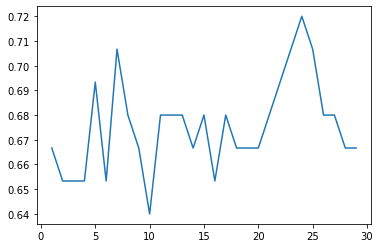

In [12]:
treelist = []
for estimators in range(1,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=42, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    treelist.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,30)), treelist)
plt.show()
#Sets up a Random Forest classifier to identify a good value for hyperparameter tuning. 

In this case, we find that 24 seems to work for the number of trees in random forest.

## **Multicollinearity Check**

In [13]:
temp = df[Features].corr()
feature =[]
collinearity=[]
for col in temp.columns:
    for i in temp.index:
        if (temp[col][i]>.9 and temp[col][i]<1) or (temp[col][i]<-.9 and temp[col][i]>-1):
                feature.append(col)
                collinearity.append(i)
                print("multicollinearity between",col," - ",i)
        else:
            print("For",col,"and",i,"there is no multicollinearity") 
#Checks for potential multicollinearity problems among the features.

For age and age there is no multicollinearity
For age and ejection_fraction there is no multicollinearity
For age and creatinine_phosphokinase there is no multicollinearity
For age and serum_creatinine there is no multicollinearity
For age and serum_sodium there is no multicollinearity
For ejection_fraction and age there is no multicollinearity
For ejection_fraction and ejection_fraction there is no multicollinearity
For ejection_fraction and creatinine_phosphokinase there is no multicollinearity
For ejection_fraction and serum_creatinine there is no multicollinearity
For ejection_fraction and serum_sodium there is no multicollinearity
For creatinine_phosphokinase and age there is no multicollinearity
For creatinine_phosphokinase and ejection_fraction there is no multicollinearity
For creatinine_phosphokinase and creatinine_phosphokinase there is no multicollinearity
For creatinine_phosphokinase and serum_creatinine there is no multicollinearity
For creatinine_phosphokinase and serum_s

Here we see that there are no multicollinearity problems to be found in the dataset so we can proceed with the models.

# **Models**

### **Logistic Regression**

In [14]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print(Fore.BLUE + "Logistic Regression Accuracy:", "{:.2f}%".format(100* log_reg_acc))
acclist.append(log_reg_acc)
#The first and easiest model to implement, decent accuracy to start.

Logistic Regression Accuracy: 66.67%


### **K Neighbors**

In [15]:
kn_c = KNeighborsClassifier(n_neighbors=5)
kn_c.fit(x_train, y_train)
kn_c_pred = kn_c.predict(x_test)
kn_c_acc = accuracy_score(y_test, kn_c_pred)
print(Fore.BLUE + "K Neighbors Accuracy:", "{:.2f}%".format(100* kn_c_acc))
acclist.append(kn_c_acc)
#Suprisingly came out lower despite the hyperparameter tuning.

K Neighbors Accuracy: 64.00%


### **Random Forest**

In [16]:
r_f = RandomForestClassifier(n_estimators=24, random_state=42, criterion='entropy')
r_f.fit(x_train, y_train)
r_f_pred = r_f.predict(x_test)
r_f_acc = accuracy_score(y_test, r_f_pred)
print(Fore.BLUE + "Random Forest Accuracy:", "{:.2f}%".format(100* r_f_acc))
acclist.append(r_f_acc)
#Highest accuracy of the three, hyperparameter tuning is present here as well.

Random Forest Accuracy: 72.00%


### **Scaled Logistic Regression**

In [17]:
log_reg2 = LogisticRegression(random_state=42)
log_reg2.fit(x_train2, y_train2)
log_reg_pred2 = log_reg2.predict(x_test2)
log_reg_acc2 = accuracy_score(y_test2, log_reg_pred2)
print(Fore.GREEN + "Scaled Logistic Regression Accuracy:", "{:.2f}%".format(100* log_reg_acc2))
acclist.append(log_reg_acc2)
#No change from the non-scaled logit.

Scaled Logistic Regression Accuracy: 66.67%


### **Scaled K Neighbors**

In [18]:
kn_c2 = KNeighborsClassifier(n_neighbors=5)
kn_c2.fit(x_train2, y_train2)
kn_c_pred2 = kn_c2.predict(x_test2)
kn_c_acc2 = accuracy_score(y_test2, kn_c_pred2)
print(Fore.GREEN + "K Neighbors Accuracy:", "{:.2f}%".format(100* kn_c_acc2))
acclist.append(kn_c_acc2)
#Accuracy has gone up after scaling, but not by much.

K Neighbors Accuracy: 66.67%


### **Scaled Random Forest**

In [19]:
r_f2 = RandomForestClassifier(n_estimators=24, random_state=42, criterion='entropy')
r_f2.fit(x_train2, y_train2)
r_f_pred2 = r_f.predict(x_test2)
r_f_acc2 = accuracy_score(y_test2, r_f_pred2)
print(Fore.GREEN + "Random Forest Accuracy:", "{:.2f}%".format(100* r_f_acc2))
acclist.append(r_f_acc2)
#The accuracy here as plumeted after scaling was implemented.

Random Forest Accuracy: 56.00%


## **Results and Analysis**

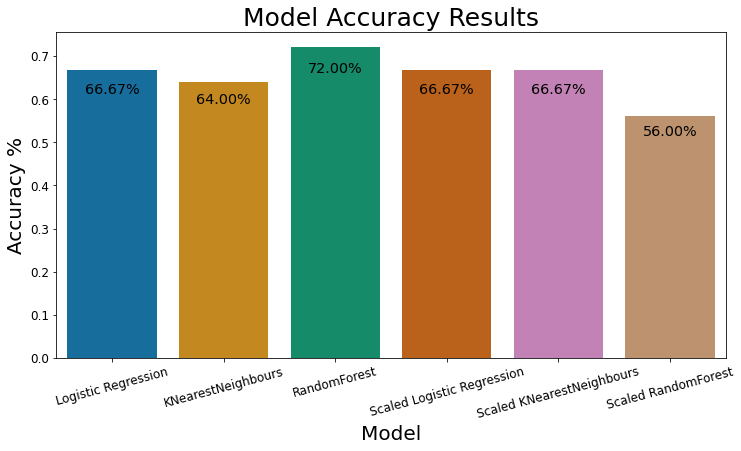

In [20]:
acclist2 = ["Logistic Regression", "KNearestNeighbours", "RandomForest", "Scaled Logistic Regression", "Scaled KNearestNeighbours", "Scaled RandomForest"]
plt.rcParams['figure.figsize']=12,6
ax = sns.barplot(x=acclist2, y=acclist, palette="colorblind", saturation=0.75)
plt.xlabel("Model", fontsize = 20)
plt.ylabel("Accuracy %", fontsize = 20)
plt.title("Model Accuracy Results", fontsize = 25)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 15)
plt.yticks(fontsize = 12)
for a in ax.patches:
    width, height = a.get_width(), a.get_height()
    x, y = a.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*.92), ha='center', fontsize = 'x-large')
plt.show()
#Bar chart for displaying the results of the different models.

Above are the compiled results of all of the models tested. From the first run of the models, we see that Random Forest had the highest accuracy score of 72%, Logit in second with 66.67%, and KNN at the lowest with 64%. After scaling the features, a second iteration of the models revealed accuracy scores of 66.67% for scaled Logit, 66.67% for scaled KNN, and 56% for scaled Random Forest. Overall we find that the highest accuracy score is still tied to the unscaled Random Forest at 72%. While KNN benefited from feature scaling, it only amounted to a 2.67% gain in accuracy which is not enough to beat out Random Forest. Logit accuracy was not impacted by scaling.

## **Discussion and Conclusion**

The goal of this project was to see if the kidney factors in the dataset can be used to successfully predict the likelihood of heart failure in a patient. After paring down the feature set to the factors most likely involved with this scenario and experimenting with models, we find that there is enough accuracy present in the results to be able to make the claim that kidney factors such as serum creatinine and serum sodium can be used to predict heart failure assuming that things like age or current heart efficiency (ejection_fraction) are controlled for in the models. Of note with the model results is the fall of Random Forest accuracy with the scaling of features. An improvement in accuracy would be expected for scaling in something like KNN, due to how the algorithm exploits distances & similarities between data samples, but in tree partitioning algorithms like Random Forest there is no analogue to the coefficients found in regression strategies. This explains why Random Forest does not see an improvement in accuracy following feature scaling, but in fact drops the most because of it. Despite the second iteration of models following the scaling, the best overall model in terms of accuracy is Random Forest. This could be improved upon in the future by the use of additional feature engineering, or increased tuning of the hyperparameters. Given that the only tree-based model that was used displays the best accuracy results, investigation and usage of other tree-based models not covered in this project may give better machine learning model. Overall based on the results of this project, there is enough accuracy in the model results to be able to confidently say that the likelihood of a patient's heart failure can be predicted to a fair degree via the usage of kidney health metrics.